# Data Science & Statistics Practice

This notebook provides an overview of key statistical concepts with Python code examples using the Seaborn tips dataset. The topics covered include:

* Exploratory Data Analysis (EDA)
* Descriptive Statistics
* Probability Theory and Distributions
* Hypothesis Testing

## 1. Exploratory Data Analysis (EDA)
### 1.1 Data Visualization
Data visualization is essential to explore and understand the structure of data. Below is an example using scatter plot and boxplot to visualize relationships in the dataset.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the tips dataset
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [7]:
df.describe(include="category").T

,count,unique,top,freq
sex,244,2,Male,157
smoker,244,2,No,151
day,244,4,Sat,87
time,244,2,Dinner,176


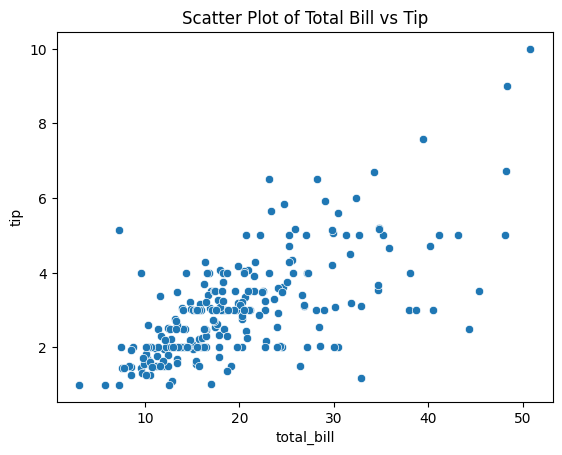

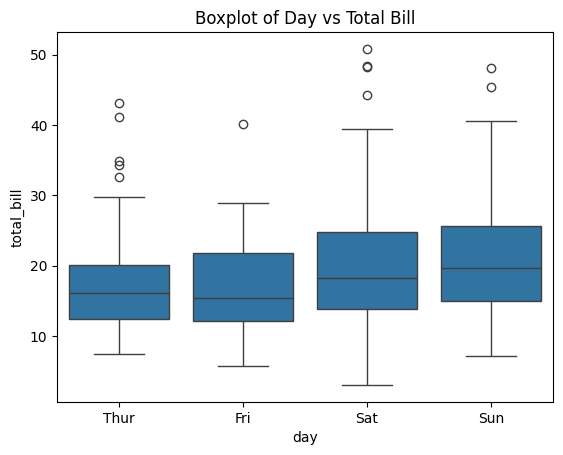

In [8]:
# Scatter plot between total bill and tip
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Scatter Plot of Total Bill vs Tip')
plt.show()

# Boxplot for day vs total bill
sns.boxplot(x='day', y='total_bill', data=df)
plt.title('Boxplot of Day vs Total Bill')
plt.show()


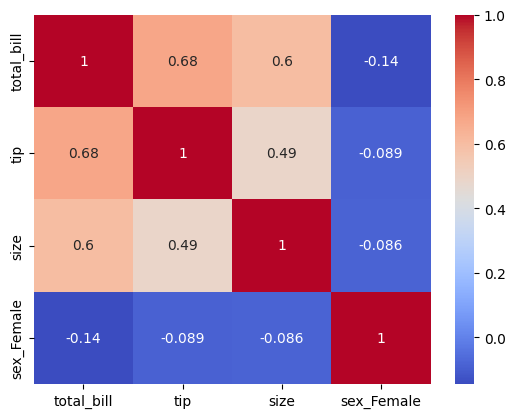

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

### 1.2 Data Cleaning and Preprocessing
Data cleaning is an essential step in data analysis. In this section, we will check for missing values and encode categorical variables.

In [9]:
# Check for missing values
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

The `pandas.get_dummies()` function converts categorical variables (columns with string or categorical data types) into numerical values using the one-hot encoding method.

In [ ]:

# Convert categorical variable 'sex' to dummy variables (numerical)
df = pd.get_dummies(df, columns=['sex'], drop_first=True)
df.head()


,total_bill,tip,smoker,day,time,size,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,1
1,10.34,1.66,No,Sun,Dinner,3,0
2,21.01,3.50,No,Sun,Dinner,3,0
3,23.68,3.31,No,Sun,Dinner,2,0
4,24.59,3.61,No,Sun,Dinner,4,1


## 2. Descriptive Statistics
### 2.1 Measures of Central Tendency
Central tendency refers to the central or typical value in a dataset. Common measures are mean, median, and mode.

In [11]:
mean_total_bill = df['total_bill'].mean()
median_total_bill = df['total_bill'].median()
mode_total_bill = df['total_bill'].mode()[0]  # First mode if multiple
print(f'Mean Total Bill: {mean_total_bill},\nMedian Total Bill: {median_total_bill},\nMode Total Bill: {mode_total_bill}')

Mean Total Bill: 19.78594262295082,
Median Total Bill: 17.795,
Mode Total Bill: 13.42


### 2.2 Measures of Dispersion
Dispersion refers to the spread of the data. Common measures include standard deviation, variance, and interquartile range (IQR).

In [12]:
std_total_bill = df['total_bill'].std()
variance_total_bill = df['total_bill'].var()
q1_total_bill = df['total_bill'].quantile(0.25)
q3_total_bill = df['total_bill'].quantile(0.75)
iqr_total_bill = q3_total_bill - q1_total_bill
print(f'Standard Deviation: {std_total_bill}, \nVariance: {variance_total_bill}, \nIQR: {iqr_total_bill}')

Standard Deviation: 8.902411954856856, 
Variance: 79.25293861397827, 
IQR: 10.779999999999998


### 2.3 Correlation and Covariance
Correlation measures the linear relationship between two variables, while covariance measures how two variables vary together.

In [13]:
correlation = df[['total_bill', 'tip']].corr()
covariance = df[['total_bill', 'tip']].cov()
print('Correlation:\n', correlation)
print("*"*50)
print('Covariance:\n', covariance)

Correlation:
             total_bill       tip
total_bill    1.000000  0.675734
tip           0.675734  1.000000
**************************************************
Covariance:
             total_bill       tip
total_bill   79.252939  8.323502
tip           8.323502  1.914455


## 3. Probability Theory and Distributions
### 3.1 Probability Distributions
We will simulate random data following different probability distributions such as normal and Poisson.

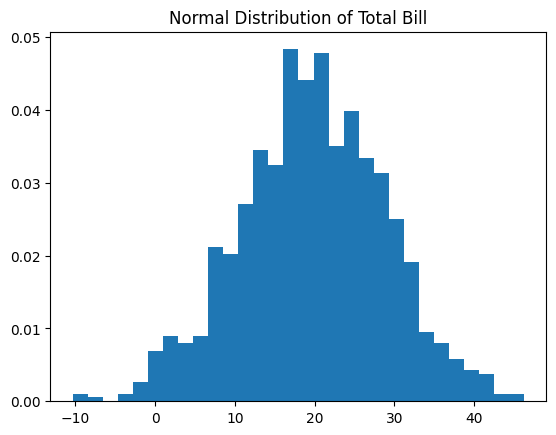

In [14]:
# Normal distribution: Simulating total_bill data
total_bill_normal = np.random.normal(mean_total_bill, std_total_bill, 1000)
plt.hist(total_bill_normal, bins=30, density=True)
plt.title('Normal Distribution of Total Bill')
plt.show()


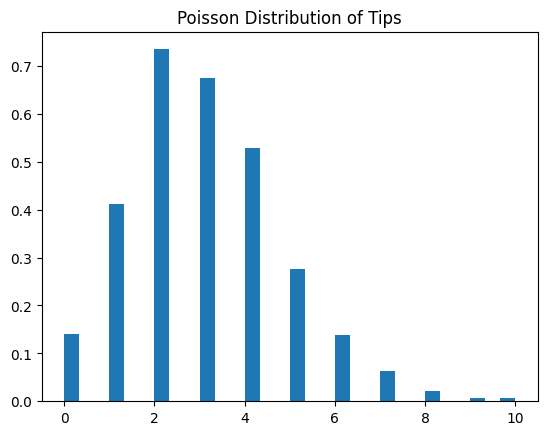

In [15]:
# Poisson distribution: Simulating tips using Poisson distribution
tip_poisson = np.random.poisson(3, 1000)  # Assume average tip of 3
plt.hist(tip_poisson, bins=30, density=True)
plt.title('Poisson Distribution of Tips')
plt.show()

### 3.2 Distribution Parameters Calculation
We will calculate the mean and standard deviation for the generated total_bill data.

In [16]:
mean_norm = np.mean(total_bill_normal)
std_norm = np.std(total_bill_normal)
print(f'Mean: {mean_norm}, \nStandard Deviation: {std_norm}')

Mean: 19.740924053765287, 
Standard Deviation: 9.053014231348552


## 4. Hypothesis Testing
### 4.1 T-Test for Two Independent Samples
A t-test compares the means of two independent groups. 

Here we will test the difference in total bill between lunch and dinner. 

The decision to reject or not reject the null hypothesis is based on the p-value. 

If the p-value is less than 0.05 (α = 0.05), the null hypothesis is rejected, and the alternative hypothesis is accepted.



#### Null Hypothesis (H₀):  
There is no statistically significant difference between the total bills for lunch and dinner. In other words, the mean bills for both groups (Lunch and Dinner) are equal.  

#### Alternative Hypothesis (H₁):  
There is a statistically significant difference between the total bills for lunch and dinner. In other words, the mean bills for both groups (Lunch and Dinner) are different.

In [17]:
lunch = df[df['time'] == 'Lunch']['total_bill']
dinner = df[df['time'] == 'Dinner']['total_bill']
t_stat, p_value = stats.ttest_ind(lunch, dinner)
print(f'T-Statistic: {t_stat}, \nP-Value: {p_value}')
if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

T-Statistic: -2.8976375218366424, 
P-Value: 0.004104621407595676
Reject the null hypothesis


In [ ]:
# lunch, dinner 
print("mean: ",lunch.mean(), dinner.mean(), 
"std :",lunch.std(), dinner.std(), 
"median:",lunch.median(), dinner.median(), 
"mode: ",lunch.mode(), dinner.mode(), 
"var: ",lunch.var(), dinner.var(),
"skew:",lunch.skew(), dinner.skew(),
"kurtosis: ",lunch.kurt(), dinner.kurt(),
"describe:",lunch.describe(), dinner.describe(), sep="\n")

mean: 
17.168676470588235
20.79715909090909
std :
7.713881827523049
9.142029152544529
median:
15.965
18.39
mode: 
0    13.42
Name: total_bill, dtype: float64
0     7.25
1    13.81
2    15.69
3    17.92
4    18.29
5    20.29
6    20.69
7    21.01
Name: total_bill, dtype: float64
var: 
59.50397284899034
83.57669702597403
skew:
1.4751303151132744
1.0335991171799397
kurtosis: 
2.206314458946415
1.0362838368476273
describe:
count    68.000000
mean     17.168676
std       7.713882
min       7.510000
25%      12.235000
50%      15.965000
75%      19.532500
max      43.110000
Name: total_bill, dtype: float64
count    176.000000
mean      20.797159
std        9.142029
min        3.070000
25%       14.437500
50%       18.390000
75%       25.282500
max       50.810000
Name: total_bill, dtype: float64


### 4.2 Chi-Square Test
A chi-square test assesses whether observed frequencies differ from expected frequencies. Let's test the relationship between sex and whether the person tipped.

The decision to reject or not reject the null hypothesis is based on the p-value. 

If the p-value is less than 0.05 (α = 0.05), the null hypothesis is rejected, and the alternative hypothesis is accepted.

#### Null Hypothesis (H₀):  
There is no relationship between gender and tipping behavior. In other words, there is no difference between men and women in terms of whether they leave a tip or not.  

#### Alternative Hypothesis (H₁):  
There is a relationship between gender and tipping behavior. In other words, there is a difference between men and women in terms of whether they leave a tip or not.

In [23]:
contingency_table = pd.crosstab(df['sex_Female'], df['tip'] > 2)  # Male vs tip > 2
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi2 Stat: {chi2_stat}, P-Value: {p_val}')
if p_val < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Chi2 Stat: 0.0, P-Value: 1.0
Fail to reject the null hypothesis


**In both tests, the decision to reject or not reject the null hypothesis is based on the p-value. If the p-value is less than 0.05 (α = 0.05), the null hypothesis is rejected, and the alternative hypothesis is accepted.**